<h1>Demonstration of the Researcher WebScraping Project</h1>

<b>Demo created on March 12</b>

In [1]:
from WebScraping import WebScraping
from User import User

#Create the WebScraping class
ws = WebScraping()

#Create the Test Researchers
zheng = User("Zheng Xiang", "Virginia Tech")
sean = User("Sean Agnew", "University of Virginia")

<p>Notice how I used <b>Virginia Tech</b> instead of <b>Virginia Polytechnic Instititute....</b>. This webscraper allows for common school names.</p>

In [2]:
ws.initial_search(zheng)

['https://htm.pamplin.vt.edu/directory/xiang.html',
 'https://www.researchgate.net/profile/Zheng-Xiang-6',
 'https://www.researchgate.net/scientific-contributions/Zheng-Xiang-2164885495',
 'https://www.journals.elsevier.com/tourism-management/editorial-board/zheng-xiang',
 'https://www.youtube.com/watch%3Fv%3DFtoSQPBzjao',
 'https://www.youtube.com/watch%3Fv%3DFtoSQPBzjao',
 'https://us.sagepub.com/en-us/nam/author/zheng-xiang']

### The `initial_search` returns all of the relevent links from Google about the user from the first page.
#### It also stores this into the internal user object.

#### Now let's search Sean.

In [2]:
ws.initial_search(sean)

['https://engineering.virginia.edu/faculty/sean-r-agnew',
 'https://publicsearch.people.virginia.edu/person/sra4p',
 'https://engineering.virginia.edu/agnew-research-group',
 'https://thecourseforum.com/instructor/1126/',
 'https://www.sciencedirect.com/author/57203775288/sean-r-agnew']

### Now lets do a scrape on some of their found links...

In [3]:
#ws.scrape_webpage(zheng.initial_search_links[0], zheng)
ws.scrape_webpage(sean.initial_search_links[0], sean)

True 3 Instituion found | Researcher name found | University website verified
Sean R. Agnew | University of Virginia School of Engineering and Applied Sciencedeadlineeventfeaturedlisttimelineopen-bookpencil-paperdummyarrowcheckboxchevronclosefetusfingerprinthamburgerheartbeatmagnifying-glassminusplaneplusribbonsearchshapeskinny-arrowtrophyuva-engineering-logouva-seas-logovenus-symbolmoleculeawardcalendarcontactemailhomeleft-arrowlightbulbnewspublicationsresearchyoutubelinkedininstagramtwitterfacebookJump to HeaderJump to Main ContentJump to FooterUniversity of Virginia School of Engineering and Applied Science | Homepage     SearchSubmit  Future GradsGraduate AdmissionGraduate ProgramsDiversity, Equity, EngagementProfessional DevelopmentFuture UndergradsExplore EngineeringAdmissionAcademicsStudent LifeUndergrad ResearchDiversity, Equity, EngagementResearchEngineering for HealthEngineering for the Cyber FutureEngineering Technologies for a Sustainable and Connected WorldOffice of Resear

In [3]:
#ws.scrape_webpage(zheng.initial_search_links[0], zheng)
ws.scrape_webpage(zheng.initial_search_links[1], zheng)

IndexError: list index out of range

In [2]:
import csv
links = []
ws = WebScraping()
with open('data/sample_researchers.csv', 'r') as file:
            reader = csv.reader(file)
            next(reader)
            for researcher in reader:
                user: User = User(researcher[0], researcher[1])
                ws.initial_search(user)
                for link in user.initial_search_links:
                        links.append(link)
                
                

In [3]:
links

['https://carleton.ca/mae/profile/alex-ellery/',
 'https://carleton.ca/auto/people/alex-ellery/',
 'https://carleton.ca/mae/profile/alex-ellery/',
 'https://www.researchgate.net/profile/Alex-Ellery',
 'https://www.ratemyprofessors.com/professor%3Ftid%3D2011858',
 'https://ieeexplore.ieee.org/author/37944917800',
 'https://carleton-ca.academia.edu/AEllery',
 'https://5minofscience.com/members/alex-ellery/',
 'https://theconversation.com/profiles/alex-ellery-700515',
 'https://www.clemson.edu/cecas/departments/ece/faculty_staff/faculty/zzhang.html',
 'https://news.clemson.edu/clemson-university-electrical-engineer-takes-on-moons-extreme-cold/',
 'https://ieeexplore.ieee.org/author/38510935500',
 'https://www.researchgate.net/scientific-contributions/Zheyu-Zhang-2044778438',
 'https://ecse.rpi.edu/lectures/2022/wide-bandgap-based-power-electronics-future-energy-and-power-systems',
 'https://www.nasa.gov/directorates/spacetech/strg/ecf22',
 'https://ground.news/article/clemson-university-e

In [3]:
eduCount = sum([1 for link in links if link.find(".edu") > -1 ])
orgCount = sum([1 for link in links if link.find(".org") > -1])
netCount = sum([1 for link in links if link.find(".net") > -1])
comCount = sum([1 for link in links if link.find(".com") > -1])
other = len(links) - eduCount - orgCount - netCount - comCount


print(eduCount, orgCount, other)

55 32 17


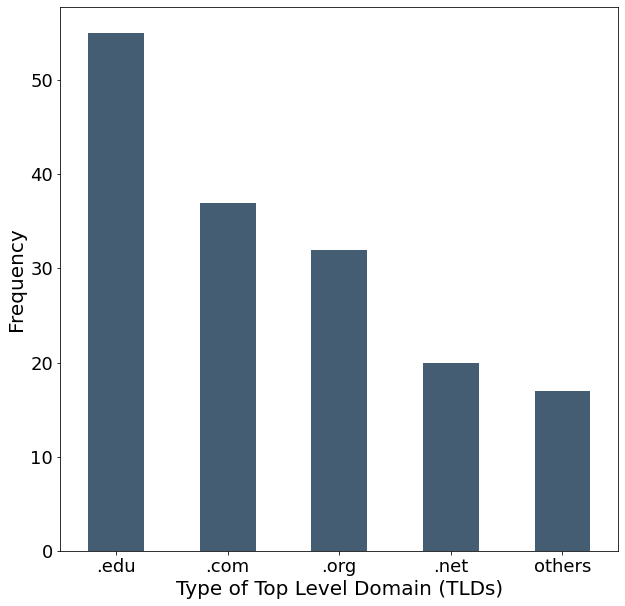

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

data = {".edu": eduCount, ".org": orgCount, ".net":netCount, ".com":comCount,  "others": other}
df = pd.Series(data).sort_values(ascending=False)
ax = df.plot.bar(legend=False, rot=0, color='#445d73', figsize=(10, 10))

ax.set_ylabel("Frequency", fontsize=20)
ax.set_xlabel('Type of Top Level Domain (TLDs)', fontsize=20)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=18)
ax.yaxis.set_tick_params(labelsize=18)

plt.savefig('link_count.png', dpi=300)